In [1]:
pip install -U sentence-transformers

In [2]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics.cluster import normalized_mutual_info_score, adjusted_rand_score
from sentence_transformers import SentenceTransformer
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [3]:
ng20 = fetch_20newsgroups(subset='test')
corpus = ng20.data[:2000]
labels = ng20.target[:2000]
k = len(set(labels))

In [4]:
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
embeddings = model.encode(corpus)

In [5]:
tsne = TSNE(n_components=2)

In [6]:
X_embedded = tsne.fit_transform(embeddings)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\pc\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


Text(0.5, 1.0, "Données dans l'espace t-SNE réduit")

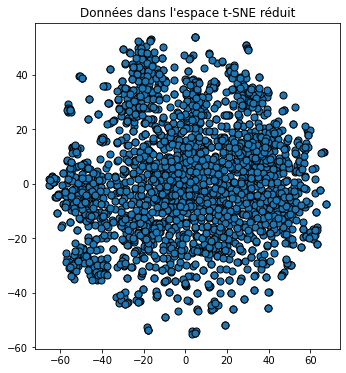

In [7]:
# Visualisation des résultats
plt.figure(figsize=(12, 6))

# Afficher les données dans l'espace t-SNE réduit
plt.subplot(1, 2, 1)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], cmap='viridis', edgecolors='k', s=50)
plt.title('Données dans l\'espace t-SNE réduit')



In [11]:
kmeans = KMeans(n_clusters=k, random_state=42)
res = kmeans.fit_predict(X_embedded)

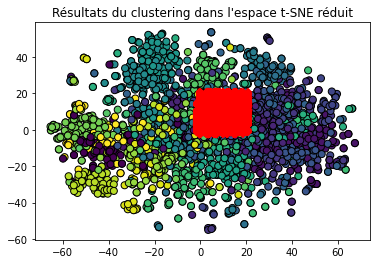

In [12]:
# Afficher les résultats du clustering dans l'espace t-SNE réduit
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=labels, cmap='viridis', edgecolors='k', s=50)
plt.scatter(res,labels, c='red', marker='X', s=200)
plt.title('Résultats du clustering dans l\'espace t-SNE réduit')
plt.show()

In [13]:
# evaluate clustering results
nmi_score = normalized_mutual_info_score(res,labels)
ari_score = adjusted_rand_score(res,labels)

print(f'NMI: {nmi_score:.2f} \nARI: {ari_score:.2f}')

NMI: 0.42 
ARI: 0.24
